# FB - Feature bagging detector
### A feature bagging detector is a meta estimator that fits a number of base detectors on various sub-samples of the dataset and use averaging or other combination methods to improve the predictive accuracy and control over-fitting.

### The sub-sample size is always the same as the original input sample size but the features are randomly sampled from half of the features to all features.

### By default, LOF is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD.

### Feature bagging first construct n subsamples by random selecting a subset of features, which induces the diversity of base estimators.

### Finally, the prediction score is generated by averaging/taking the maximum of all base detectors. 
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.feature_bagging

### Arguments that work with FeatureBagging algorithm:
1. base_estimator
2. n_estimators
3. contamination
4. max_features
5. bootstrap_features
6. check_detector
7. check_estimator
8. n_jobs
9. random_state
10. combination
11. verbose
12. estimator_params

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=7, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   240.292594 seconds
image downsampling       ...took     7.614026 seconds
image downsampling       ...took    10.443359 seconds
image downsampling       ...took    13.339478 seconds
image downsampling       ...took    16.176196 seconds
image downsampling       ...took    32.839850 seconds
image downsampling       ...took    35.669521 seconds
image downsampling       ...took    42.058375 seconds
image downsampling       ...took    44.879341 seconds
image downsampling       ...took    47.733824 seconds
image downsampling       ...took    50.861072 seconds
image downsampling       ...took    53.723454 seconds
image downsampling       ...took    56.565544 seconds
image downsampling       ...took    59.405793 seconds
image downsampling       ...took    62.256674 seconds
image downsampling       ...took    68.618468 seconds
image downsampling       ...took    85.291466 seconds
image downsampling       ...took    88.114448 seconds
image downsampling       ...

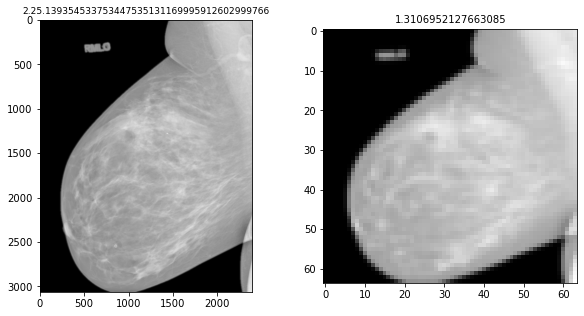

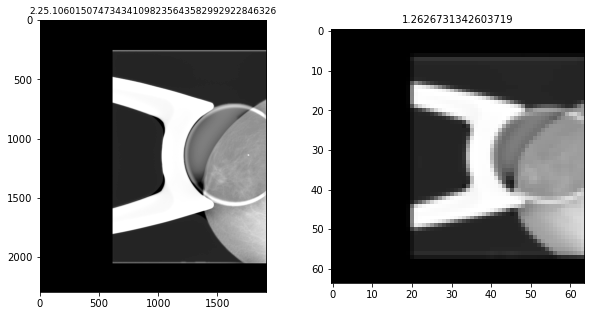

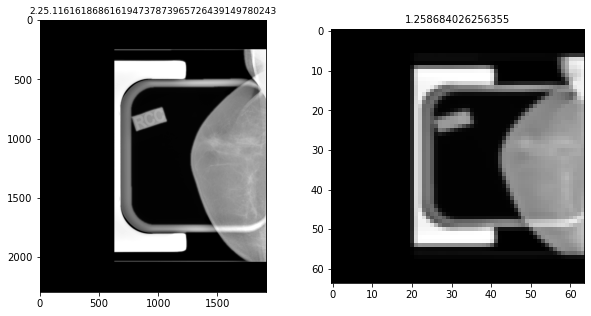

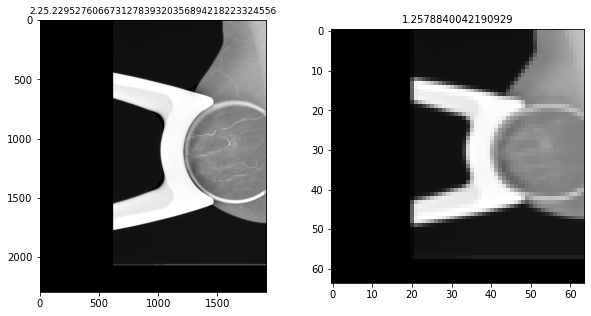

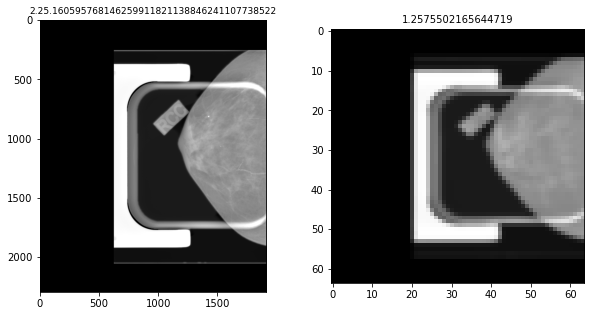

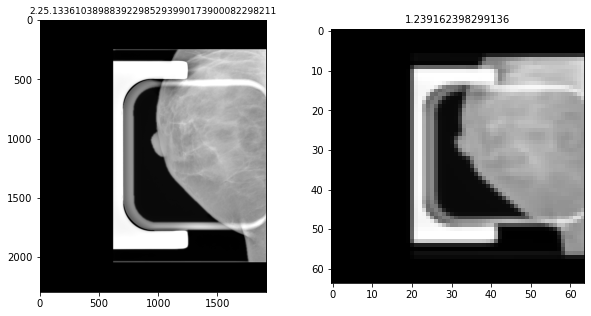

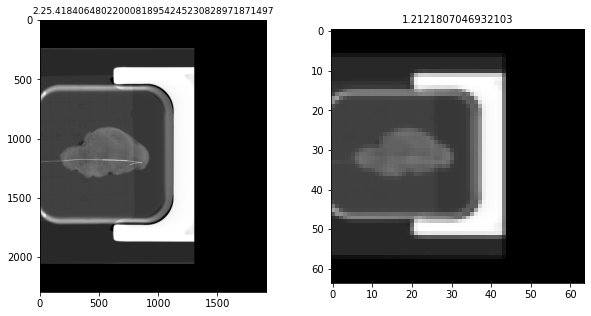

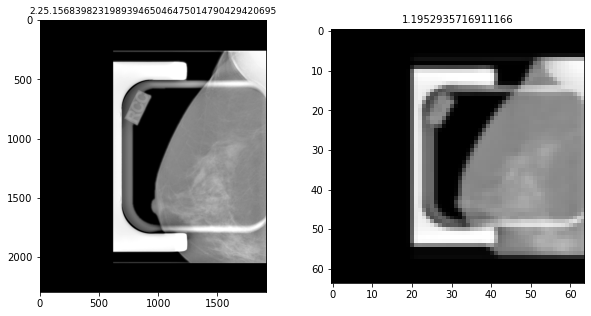

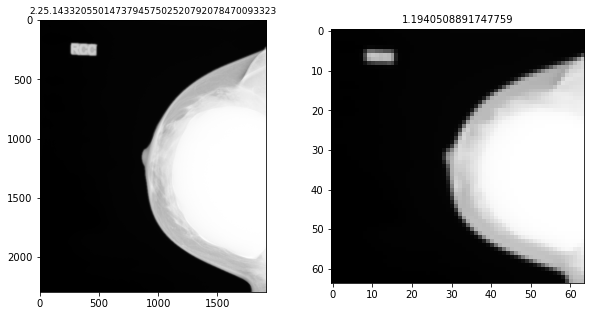

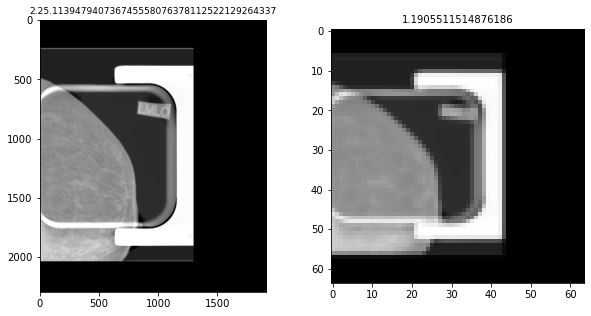

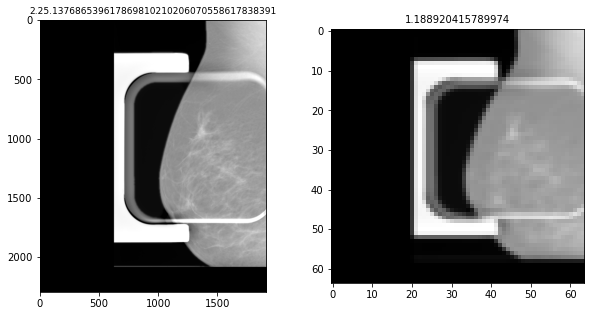

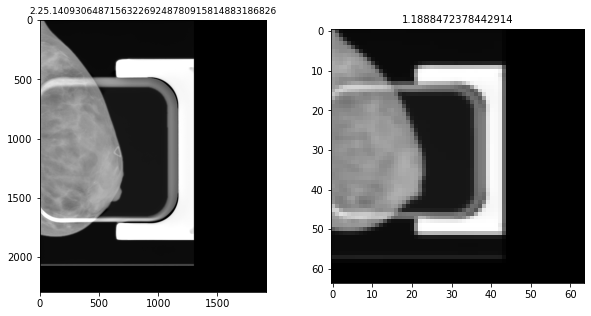

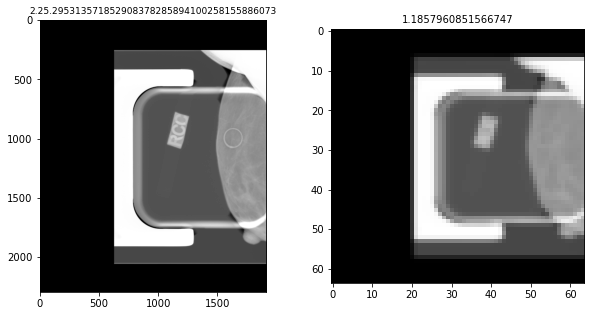

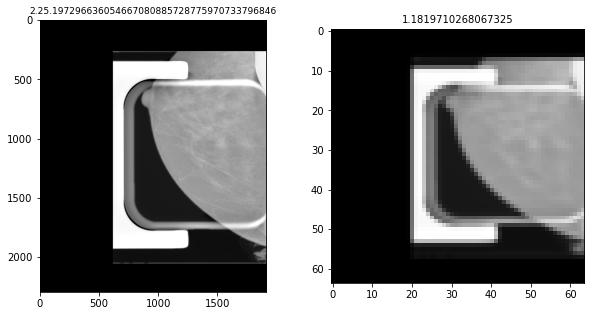

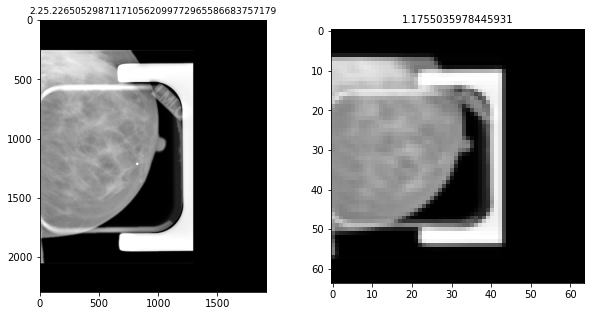

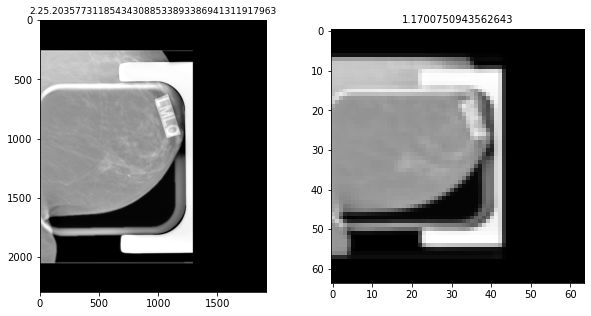

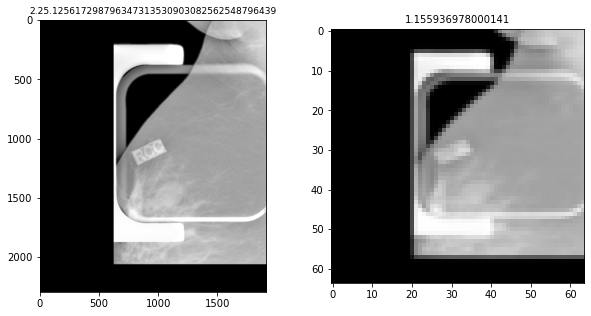

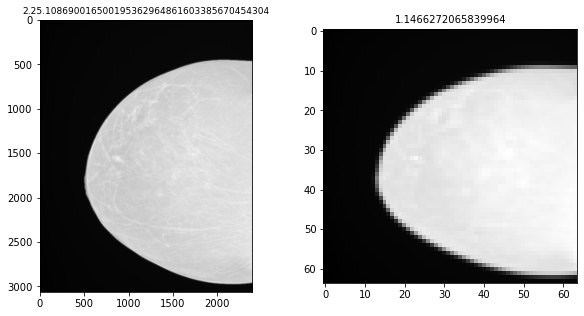

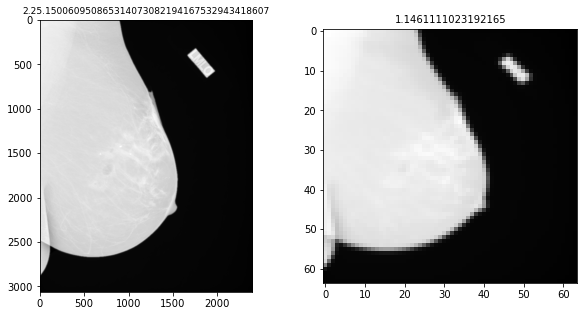

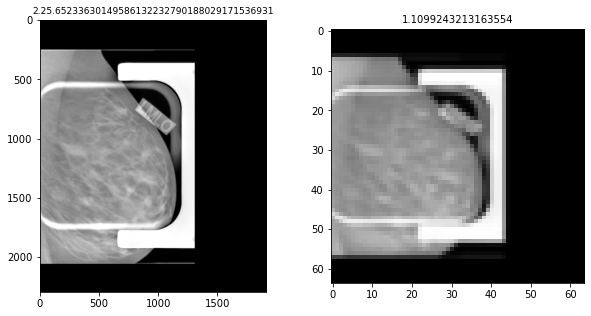

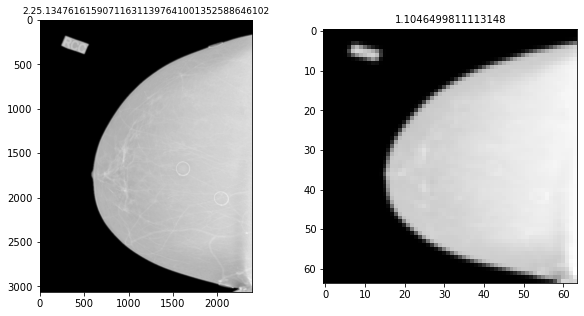

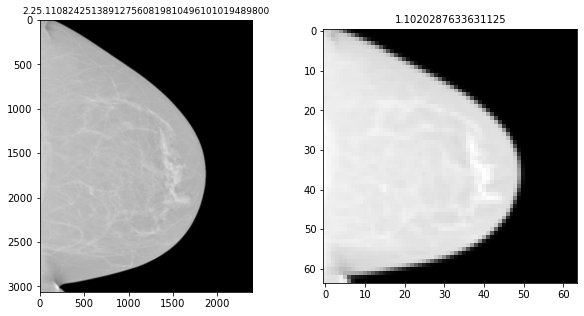

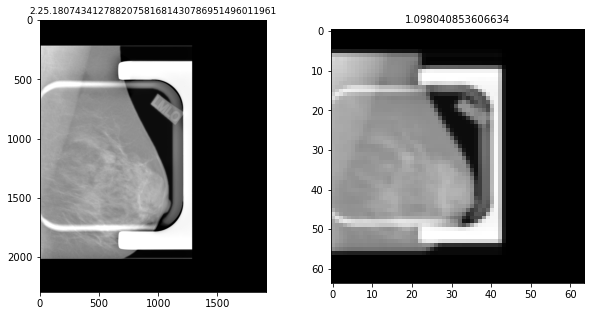

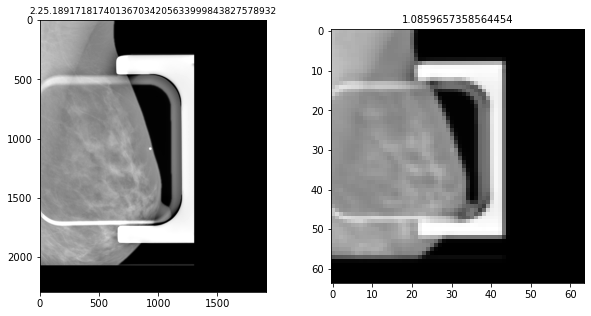

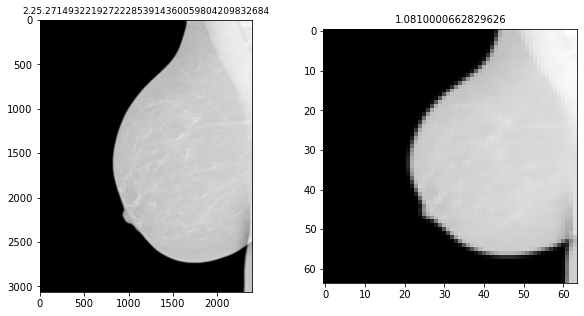

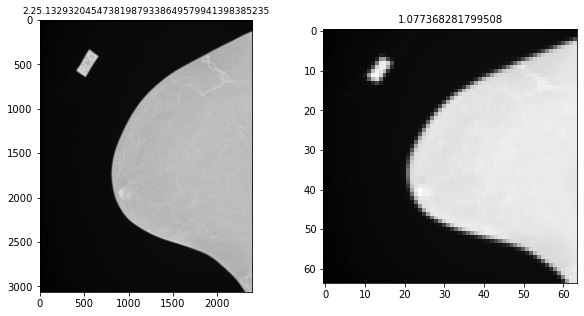

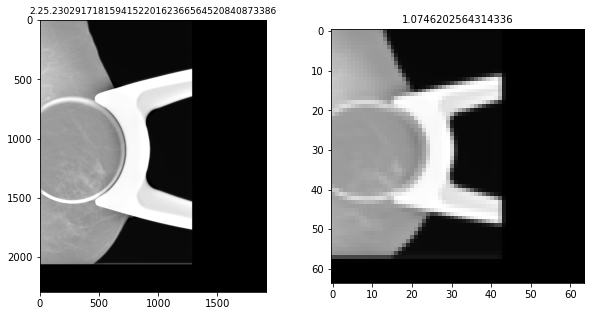

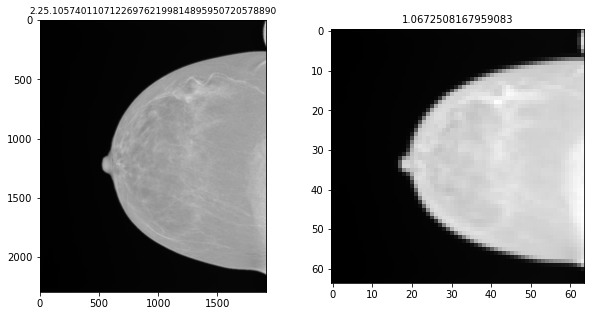

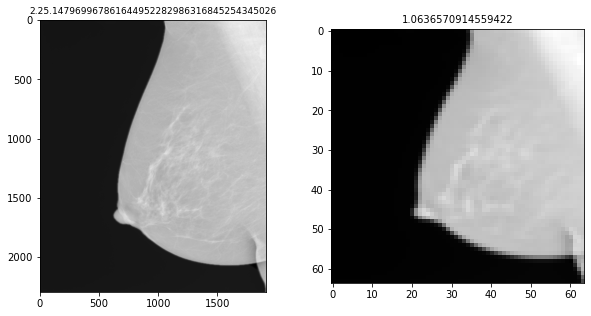

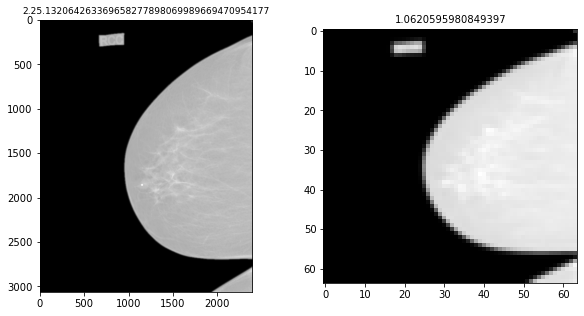

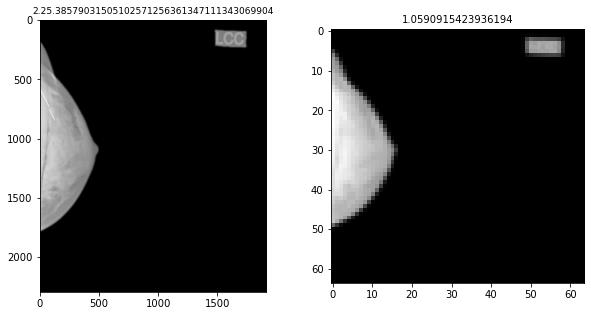

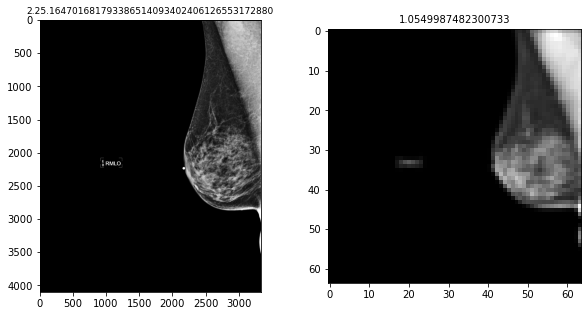

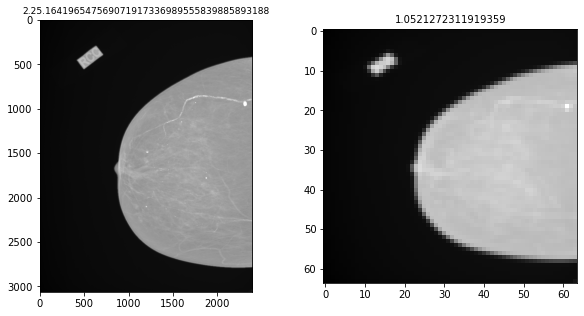

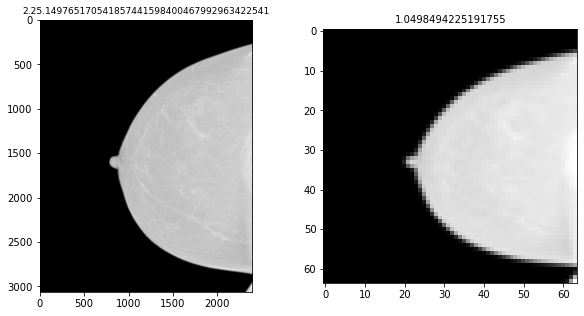

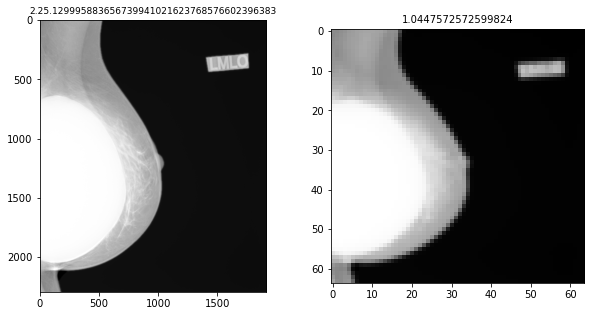

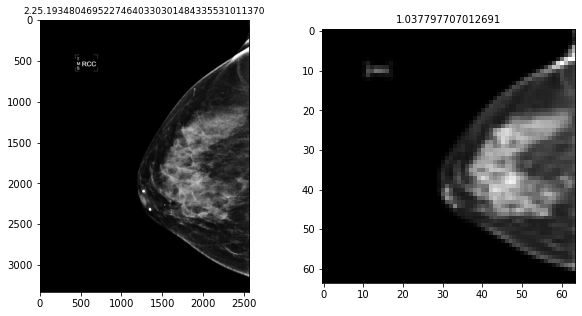

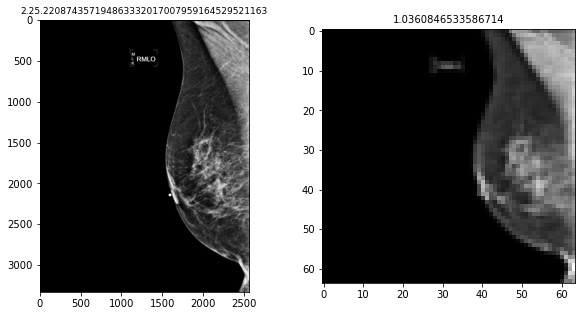

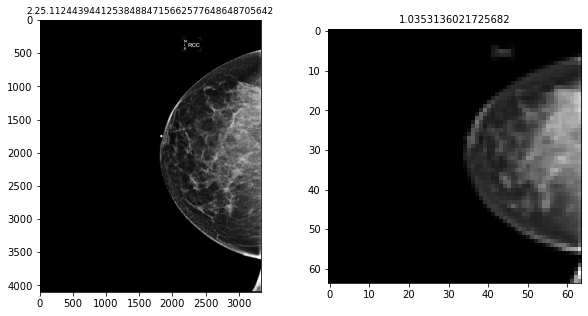

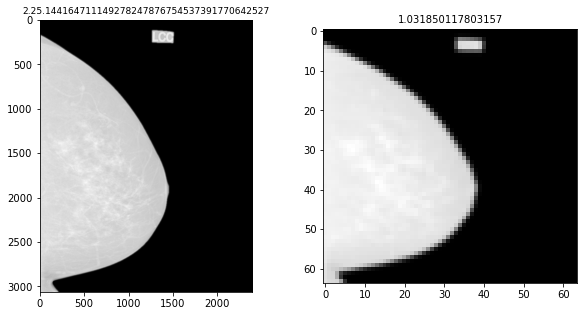

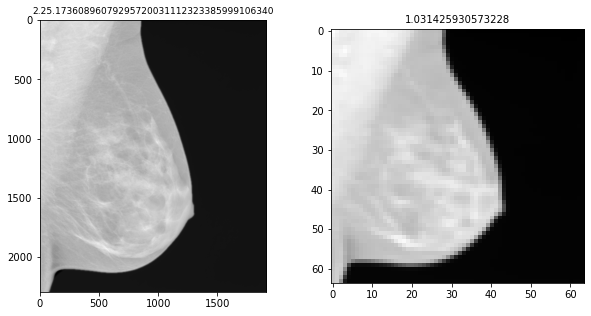

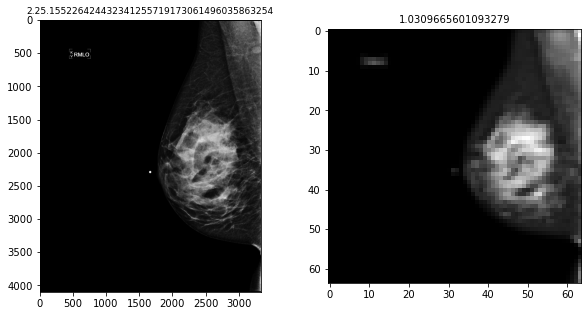

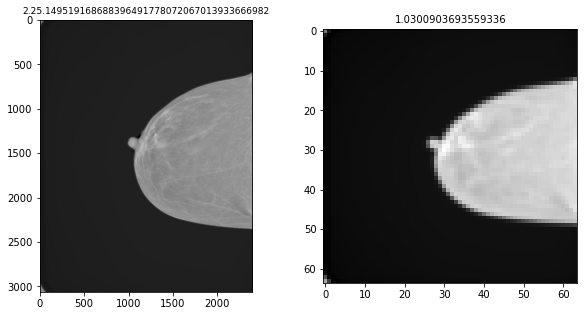

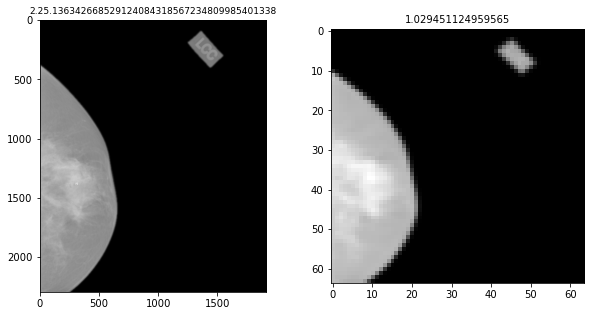

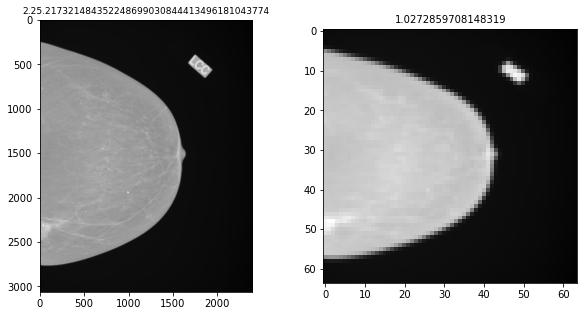

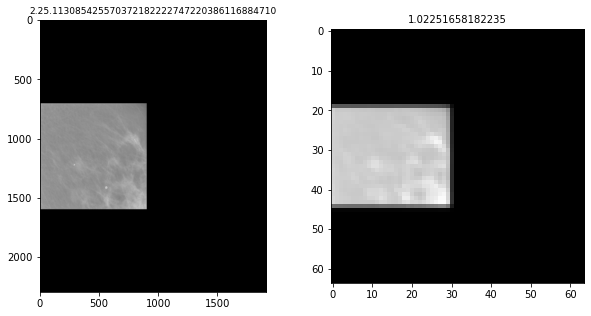

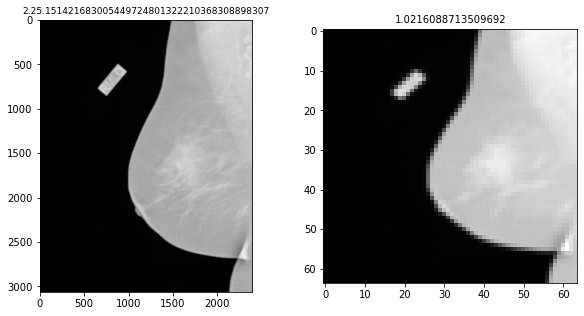

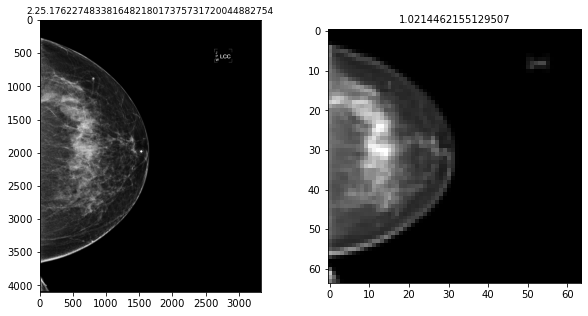

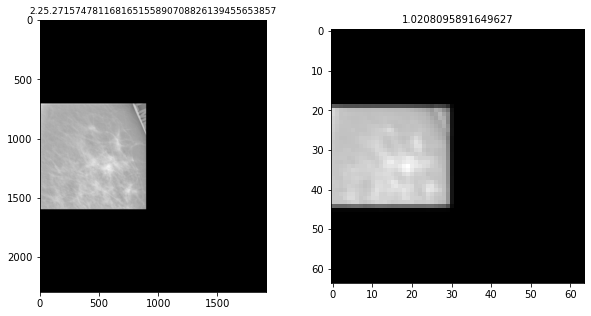

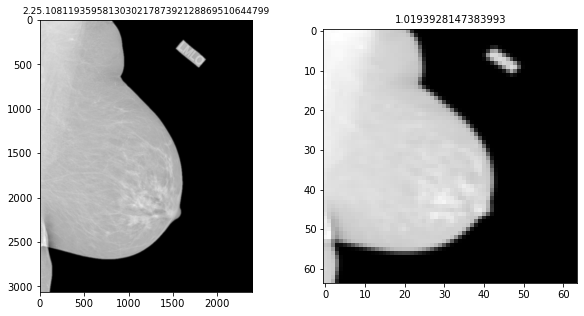

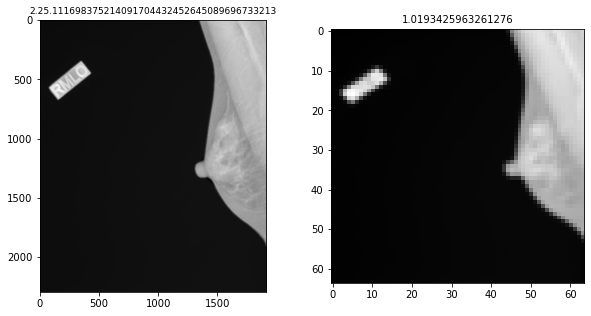

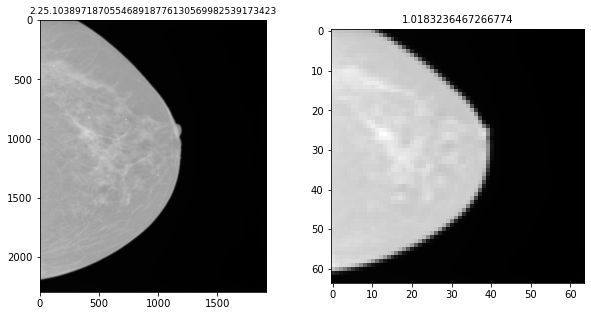

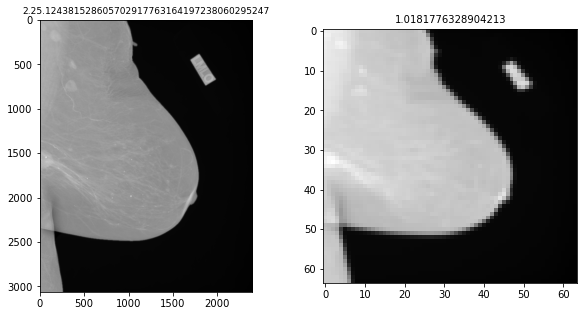

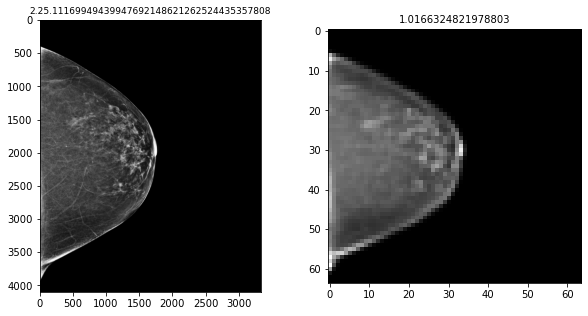

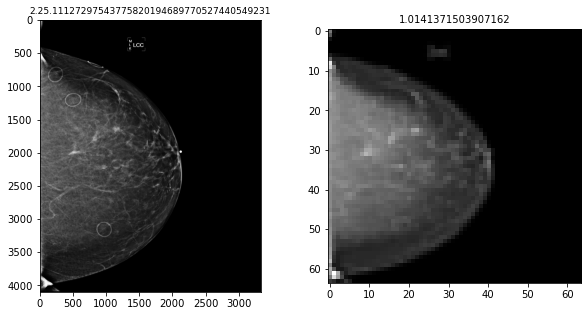

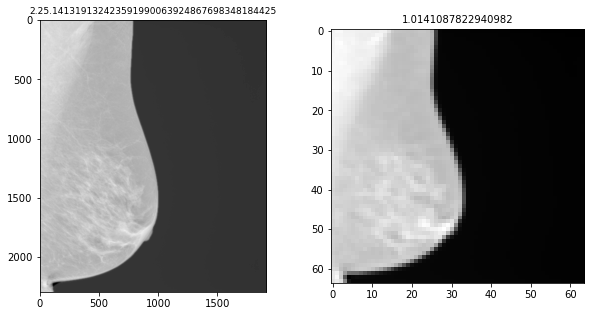

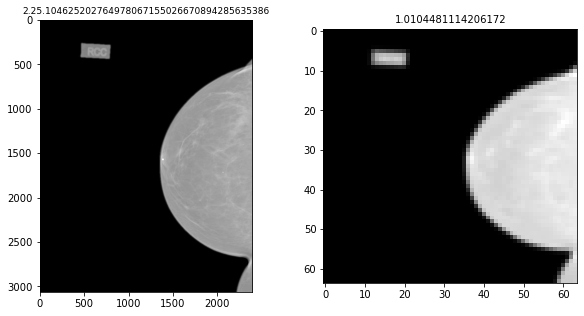

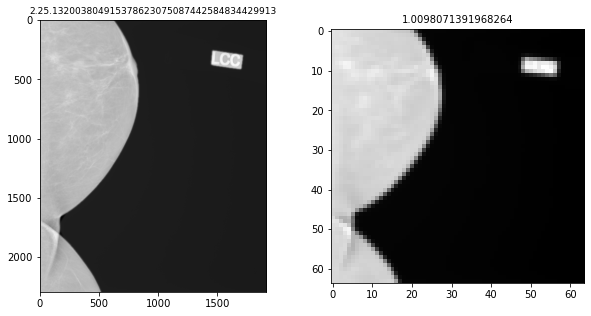

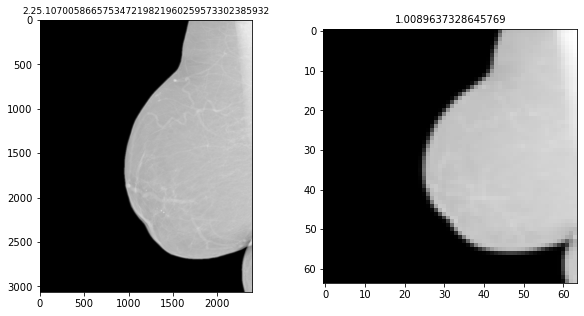

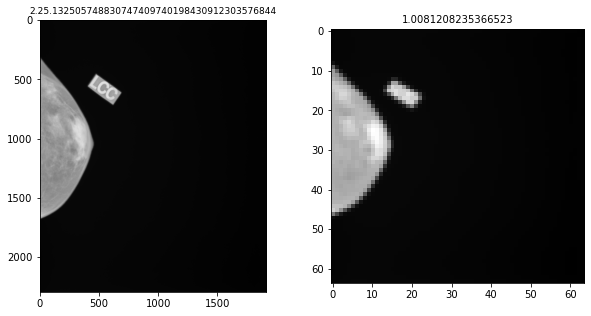

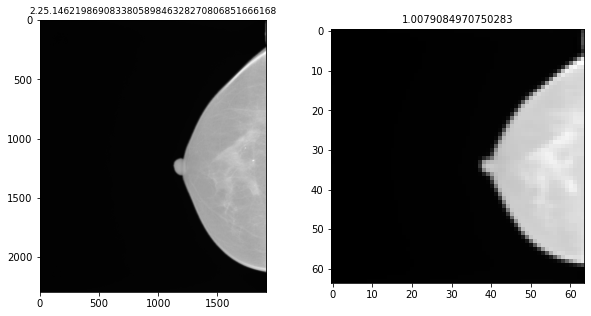

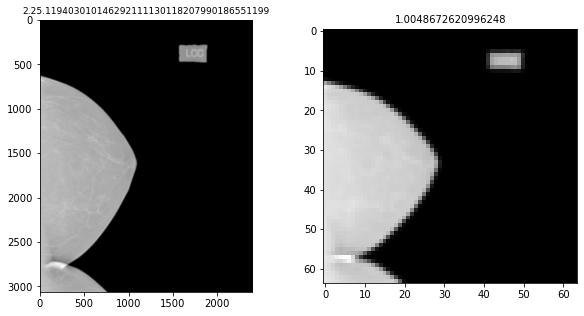

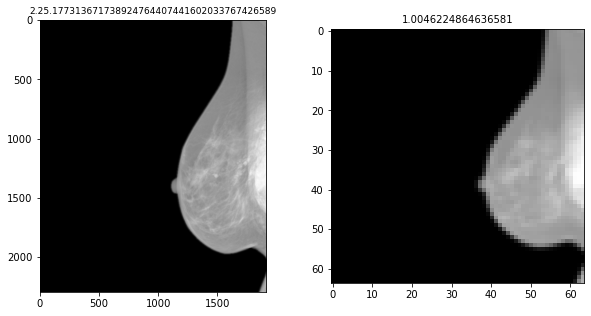

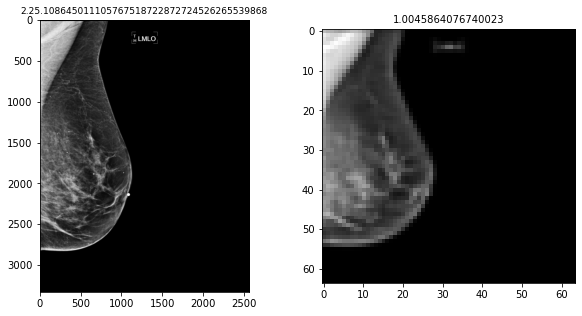

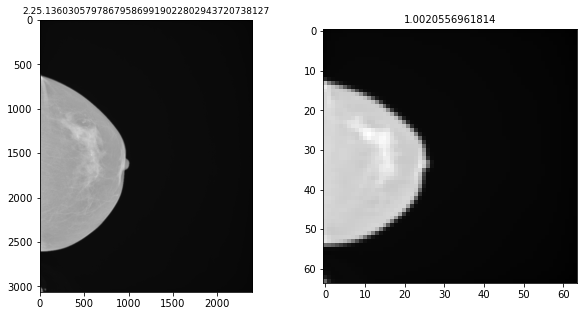

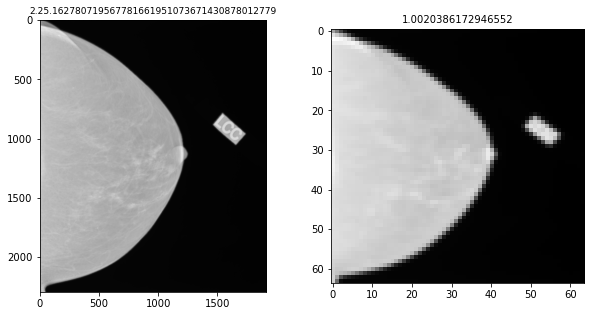

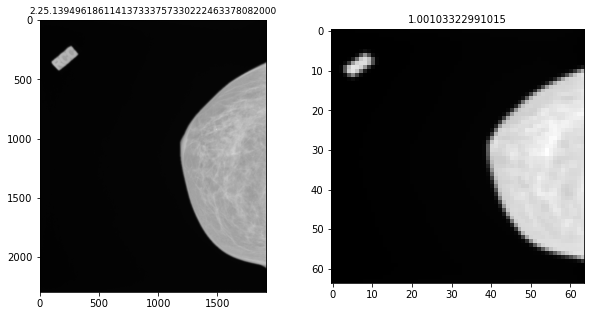

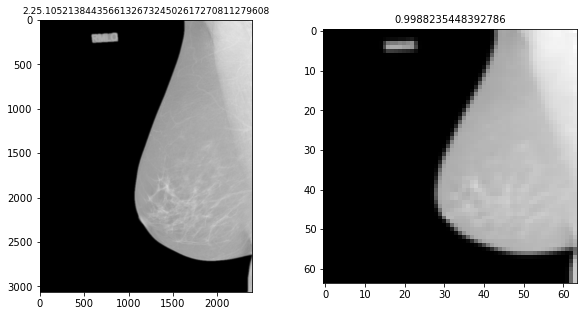

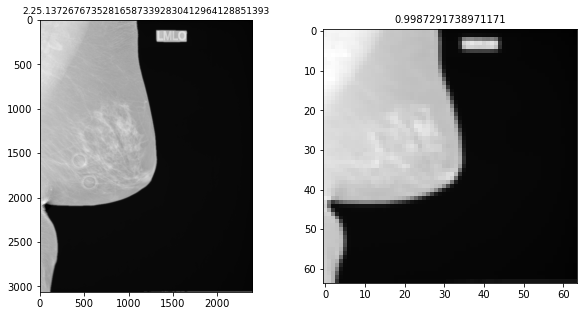

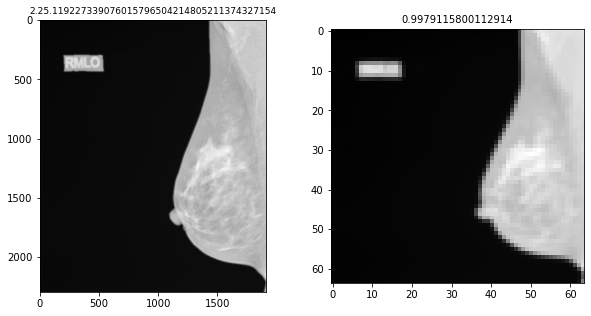

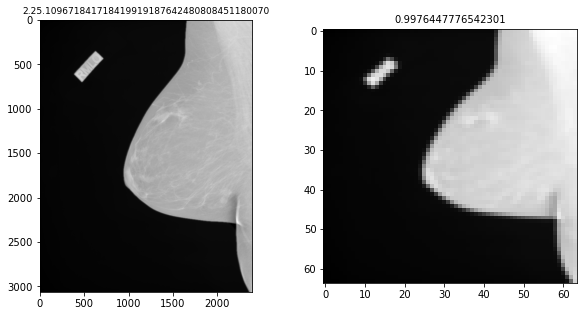

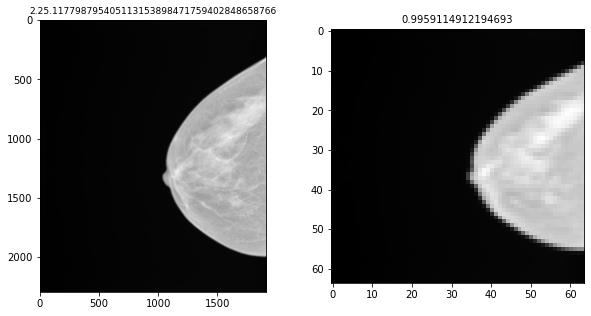

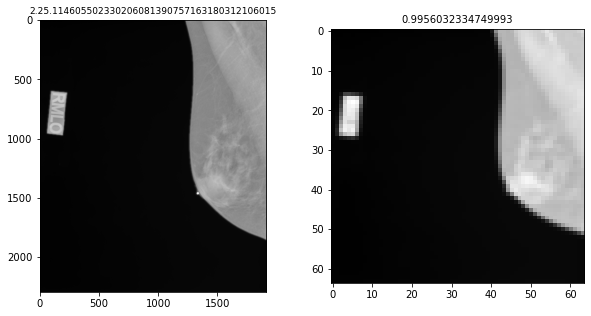

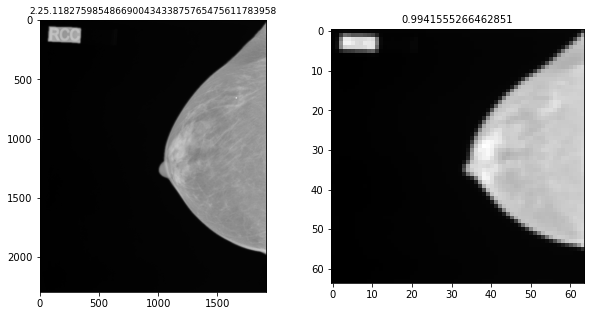

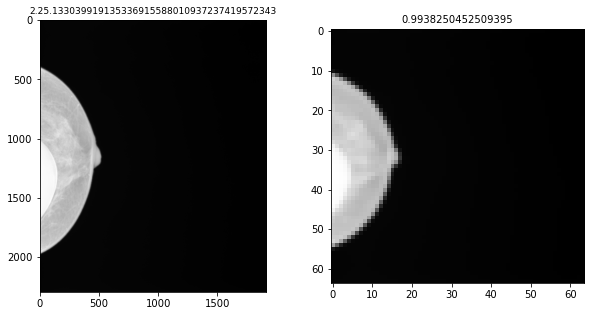

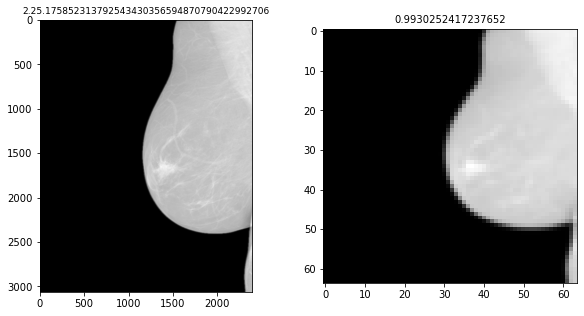

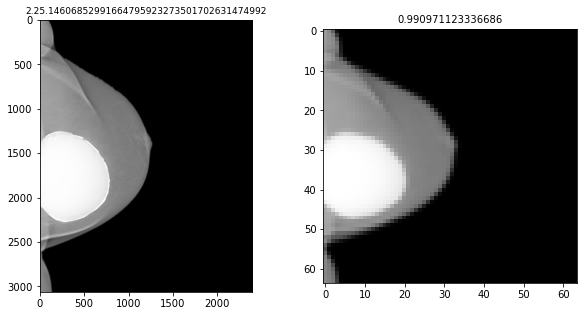

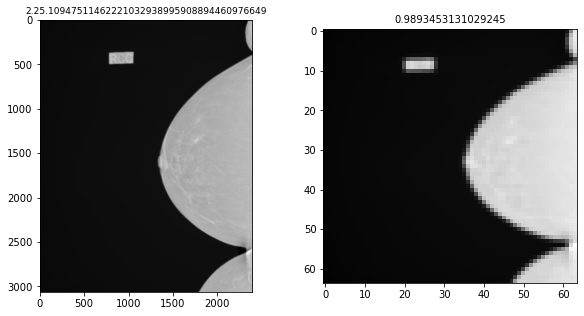

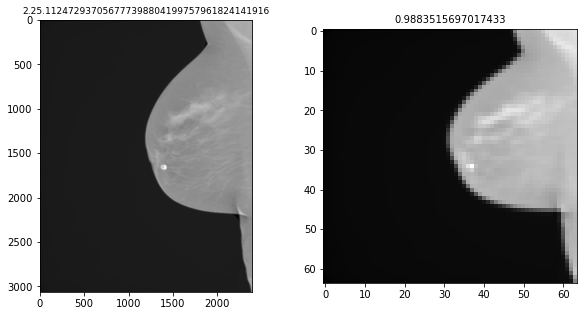

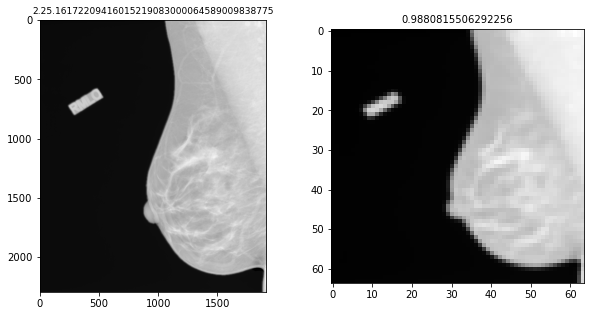

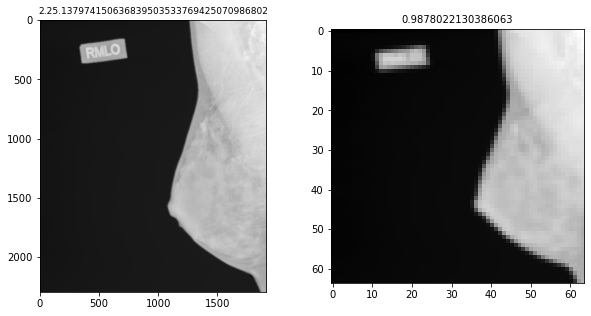

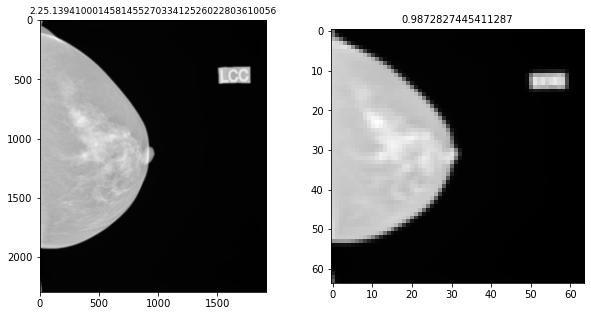

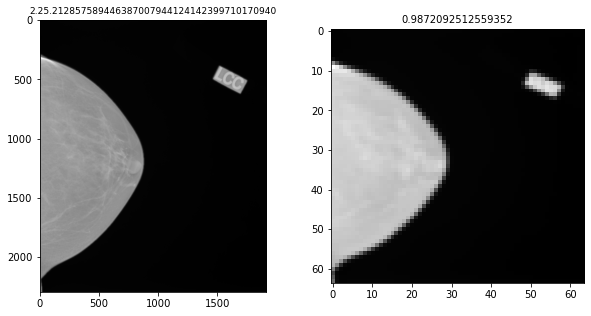

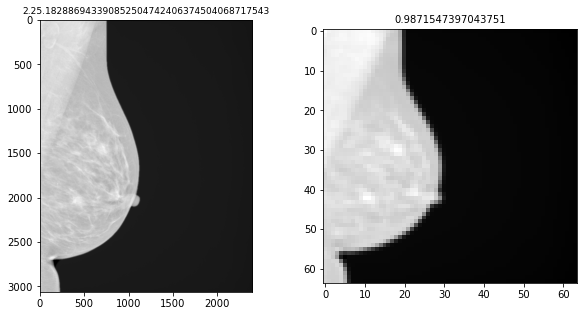

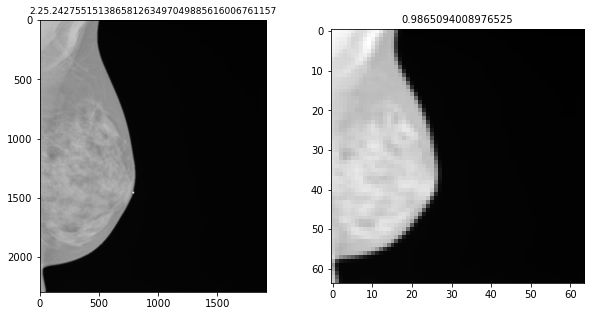

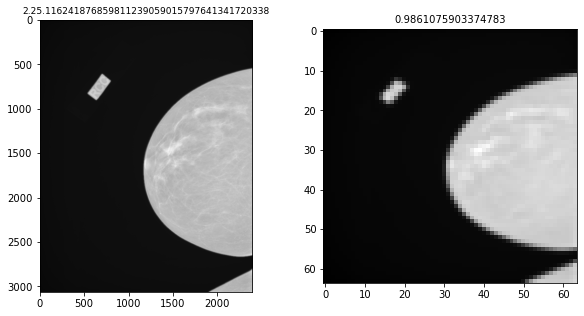

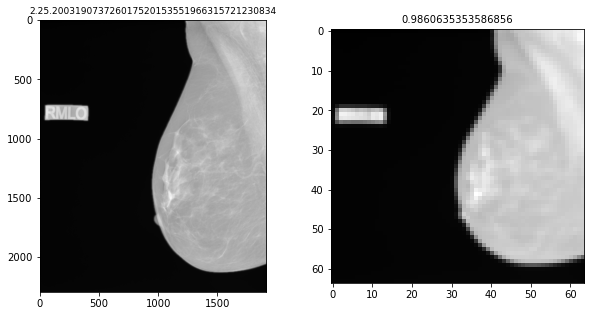

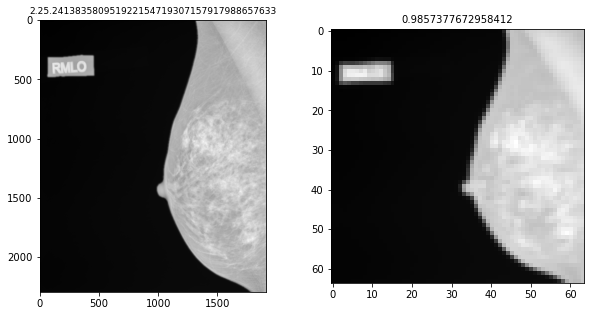

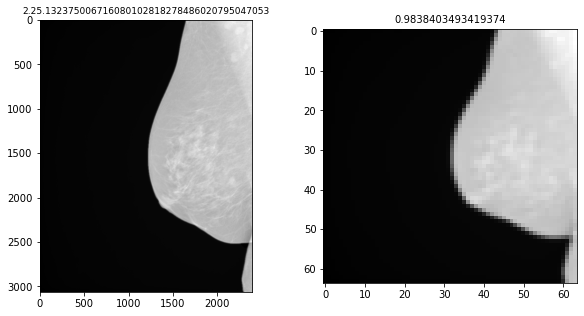

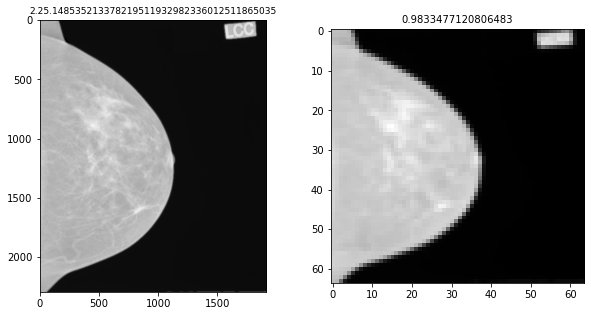

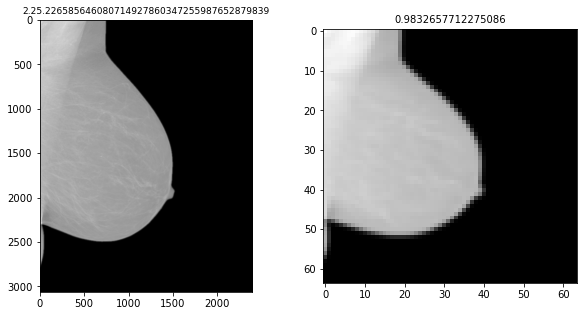

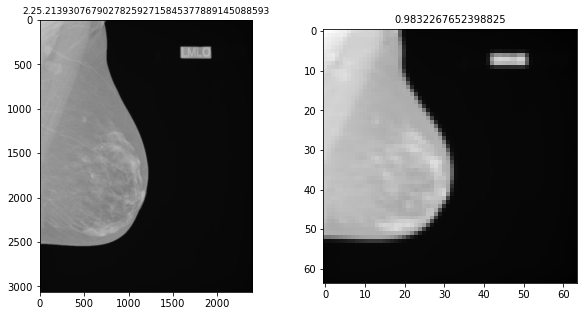

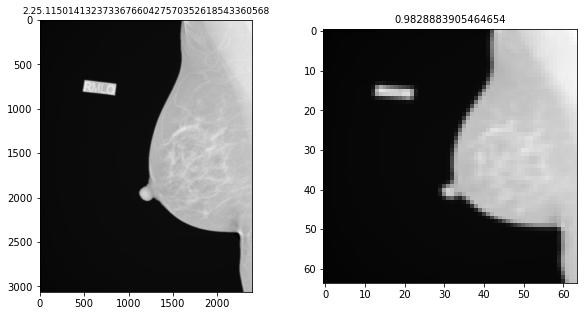

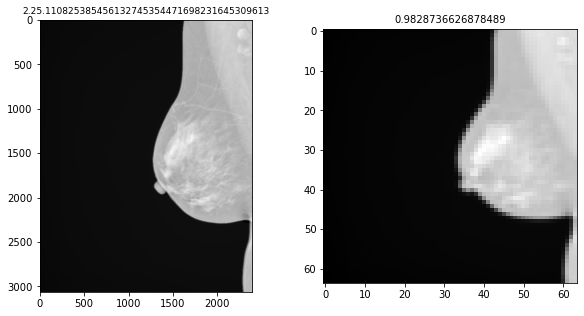

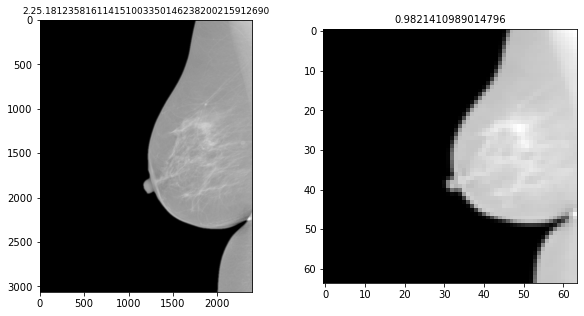

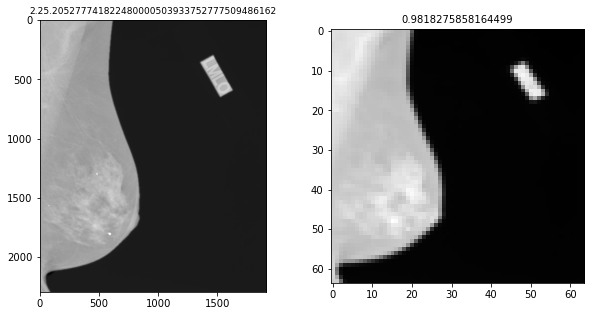

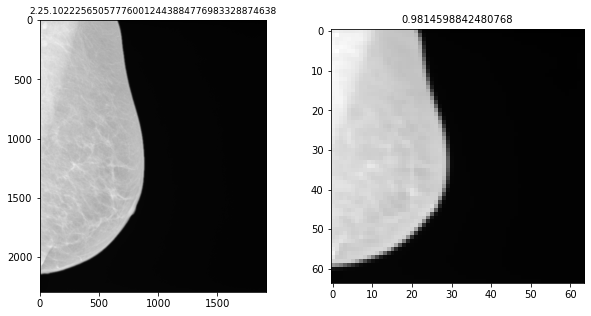

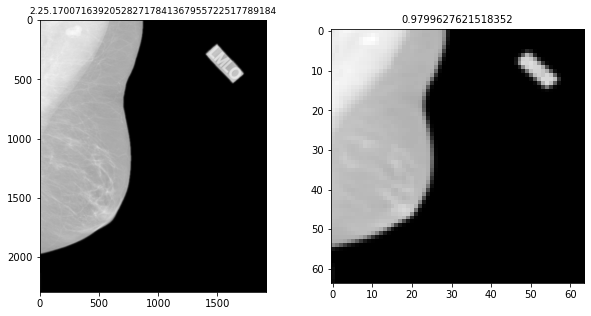

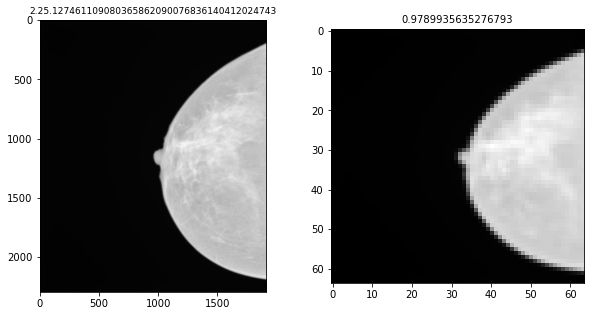

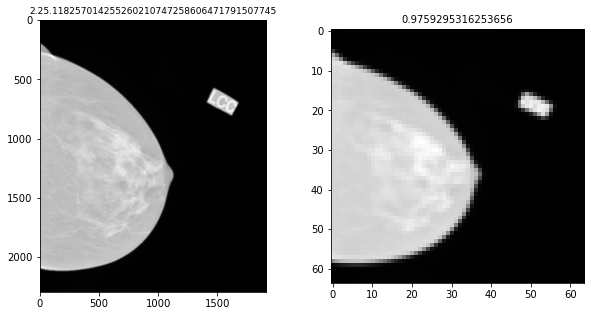

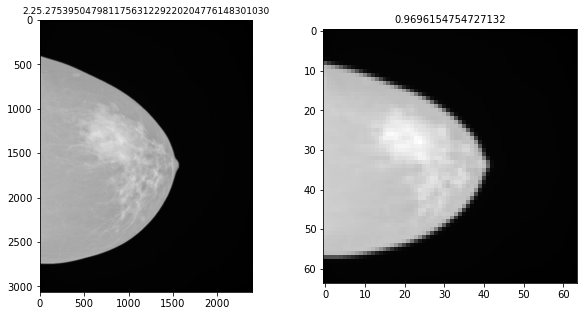

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='FB')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])